# **PROJECT**
# Part 2

### STUDENTS:


#### - Gal Leibovich 208238352
#### - Amit Mirzayev 206765869

- [Github_Link](https://github.com/galeibo/property-analysis)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_type         786 non-null    object 
 1   neighborhood          784 non-null    object 
 2   address               758 non-null    object 
 3   room_num              788 non-null    float64
 4   floor                 783 non-null    object 
 5   area                  788 non-null    int64  
 6   garden_area           662 non-null    float64
 7   days_to_enter         608 non-null    float64
 8   num_of_payments       781 non-null    float64
 9   monthly_arnona        628 non-null    float64
 10  building_tax          656 non-null    float64
 11  total_floors          743 non-null    float64
 12  description           783 non-null    object 
 13  has_parking           788 non-null    int64  
 14  has_storage           788 non-null    int64  
 15  elevator              7

These are parameters for which no replacement value can be provided and they are critical for calculating the rental price.

In [3]:
df = df.dropna(subset=['property_type', 'address', 'floor','price','neighborhood'])

Removing duplicates.

In [4]:
df = df[~df.duplicated(subset=['address', 'room_num', 'neighborhood','floor'], keep='first')]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 787
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_type         707 non-null    object 
 1   neighborhood          707 non-null    object 
 2   address               707 non-null    object 
 3   room_num              707 non-null    float64
 4   floor                 707 non-null    object 
 5   area                  707 non-null    int64  
 6   garden_area           588 non-null    float64
 7   days_to_enter         557 non-null    float64
 8   num_of_payments       705 non-null    float64
 9   monthly_arnona        582 non-null    float64
 10  building_tax          605 non-null    float64
 11  total_floors          669 non-null    float64
 12  description           702 non-null    object 
 13  has_parking           707 non-null    int64  
 14  has_storage           707 non-null    int64  
 15  elevator              7

Filling missing values with 0, except for the number of payments which is typically 12 in the rental world.

In [6]:
df['garden_area'] = df['garden_area'].fillna(0)
df['days_to_enter'] = df['days_to_enter'].fillna(0)
df['num_of_payments'] = df['num_of_payments'].fillna(12)
df['handicap'] = df['handicap'].fillna(0)
df['num_of_images'] = df['num_of_images'].fillna(0)
df['num_of_payments'] = df['num_of_payments'].replace(0 , 12)
df['days_to_enter'] = df['days_to_enter'].replace(-1 , 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 787
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_type         707 non-null    object 
 1   neighborhood          707 non-null    object 
 2   address               707 non-null    object 
 3   room_num              707 non-null    float64
 4   floor                 707 non-null    object 
 5   area                  707 non-null    int64  
 6   garden_area           707 non-null    float64
 7   days_to_enter         707 non-null    float64
 8   num_of_payments       707 non-null    float64
 9   monthly_arnona        582 non-null    float64
 10  building_tax          605 non-null    float64
 11  total_floors          669 non-null    float64
 12  description           702 non-null    object 
 13  has_parking           707 non-null    int64  
 14  has_storage           707 non-null    int64  
 15  elevator              7

We chose to fill in the missing values in the monthly_arnona and building_tax columns by calculating the average price in each neighborhood and using it to replace missing values within the same neighborhood.
Afterward, we noticed that the remaining missing values corresponded to property types such as basement units or unit apartments. In these cases, the monthly property tax is usually included in the rental price, and there is no building maintenance fee. Therefore, we chose to fill these remaining missing values with 0.

In [8]:
df.groupby('neighborhood')[['monthly_arnona']].mean()

,monthly_arnona
neighborhood,
אזורי חן,1165.000000
אפקה,500.000000
בית שטראוס,502.000000
בצרון,721.200000
גבעת הרצל,300.000000
...,...
שיכוני חסכון,230.000000
שפירא,437.466667
תל ברוך צפון,NaN


In [9]:
df['monthly_arnona'] = df['monthly_arnona'].fillna(df.groupby('neighborhood')['monthly_arnona'].transform('mean'))

In [10]:
df[df['monthly_arnona'].isna()]

,property_type,neighborhood,address,room_num,floor,area,garden_area,days_to_enter,num_of_payments,monthly_arnona,...,ac,handicap,has_bars,has_safe_room,has_balcony,is_furnished,is_renovated,price,num_of_images,distance_from_center
219,דירה,תל ברוך צפון,אהרון בקר 9,3.0,7,75,0.0,0.0,3.0,NaN,...,1,1,0,1,1,1,1,9000.0,10.0,9546.0
290,יחידת דיור,רמת החייל,הגולן 128,1.5,1,25,0.0,0.0,12.0,NaN,...,1,0,0,1,0,0,1,4000.0,2.0,186481.0
291,יחידת דיור,רמת החייל,הגולן 46,1.5,2,55,0.0,0.0,12.0,NaN,...,1,0,0,0,0,1,1,4300.0,5.0,10039.0
292,מרתף/פרטר,רמת החייל,רמות צהלה 1,2.0,0,50,0.0,0.0,12.0,NaN,...,1,0,0,1,0,1,1,4500.0,2.0,10694.0
482,סטודיו/לופט,רמת הטייסים,אשרמן יוסף 5,1.0,0,16,30.0,0.0,12.0,NaN,...,1,0,1,1,0,1,1,2500.0,6.0,5900.0
489,יחידת דיור,רמת ישראל,שביל היסמין 19,2.0,2,60,100.0,0.0,4.0,NaN,...,1,0,0,0,0,0,0,3500.0,6.0,4200.0


In [11]:
df['monthly_arnona'] = df['monthly_arnona'].fillna(0)

In [12]:
df['building_tax'] = df['building_tax'].fillna(df.groupby('neighborhood')['building_tax'].transform('mean'))

In [13]:
df[df['building_tax'].isna()]

,property_type,neighborhood,address,room_num,floor,area,garden_area,days_to_enter,num_of_payments,monthly_arnona,...,ac,handicap,has_bars,has_safe_room,has_balcony,is_furnished,is_renovated,price,num_of_images,distance_from_center
219,דירה,תל ברוך צפון,אהרון בקר 9,3.0,7,75,0.0,0.0,3.0,0.0,...,1,1,0,1,1,1,1,9000.0,10.0,9546.0
290,יחידת דיור,רמת החייל,הגולן 128,1.5,1,25,0.0,0.0,12.0,0.0,...,1,0,0,1,0,0,1,4000.0,2.0,186481.0
291,יחידת דיור,רמת החייל,הגולן 46,1.5,2,55,0.0,0.0,12.0,0.0,...,1,0,0,0,0,1,1,4300.0,5.0,10039.0
292,מרתף/פרטר,רמת החייל,רמות צהלה 1,2.0,0,50,0.0,0.0,12.0,0.0,...,1,0,0,1,0,1,1,4500.0,2.0,10694.0
481,דירה,דקר,נחל שורק 18,2.0,4,50,0.0,0.0,12.0,200.0,...,0,0,0,0,0,0,0,4100.0,4.0,6900.0
482,סטודיו/לופט,רמת הטייסים,אשרמן יוסף 5,1.0,0,16,30.0,0.0,12.0,0.0,...,1,0,1,1,0,1,1,2500.0,6.0,5900.0
487,דירה,דקר,חסידי האומות 22,4.0,8,100,0.0,0.0,12.0,200.0,...,1,0,0,1,1,0,1,8500.0,7.0,6300.0
489,יחידת דיור,רמת ישראל,שביל היסמין 19,2.0,2,60,100.0,0.0,4.0,0.0,...,1,0,0,0,0,0,0,3500.0,6.0,4200.0


In [14]:
df['building_tax'] = df['building_tax'].fillna(0)

## fix floor:
We identified several issues in the floor and total_floors columns and addressed them by building a dedicated function.
- The `fix_floor` function standardized problematic values in `floor` and `total_floors` (e.g., parsing from strings or fixing outliers).

In [15]:
df['floor'].unique()

array(['2', '1', '3', '6', '0', '4', '5', '9', '7', '3 מתוך 4',
       '2 מתוך 4', 'קרקע מתוך 4', '2 מתוך 3', '5 מתוך 7', '1 מתוך 4',
       '3 מתוך 6', 'קרקע מתוך קרקע', '3 מתוך 3', 'קרקע מתוך 3',
       '2 מתוך 5', '6 מתוך 25', '7 מתוך 20', '3 מתוך 5', '1 מתוך 3',
       '6 מתוך 6', '1 מתוך 5', 'קרקע מתוך 34', '4 מתוך 6', '10 מתוך 10',
       '20 מתוך 20', '8', '13', '11', '10', '20', '18', '27', '35', '34',
       '110', '810', '44', '15', '14', '24', '16', '45', '1419', '610',
       '12', '19'], dtype=object)

In [16]:
df['total_floors'].unique()

array([ 4.,  3.,  5.,  7., 20.,  2.,  0.,  6.,  9., 11., 10., 12.,  8.,
       23., 24., 14.,  1., nan, 16., 13., 26., 27., 30., 15., 28., 18.,
       22., 19., 44., 40., 49., 50., 35., 17., 48., 46., 36., 42.])

In [17]:
import re
def fix_floor(floor, total_floors):
    if pd.isna(total_floors):
        total_floors = ''
    try:
        if int(floor) > int(total_floors):
            if len(floor) == 2 :
                floors = re.findall("([0-9])([0-9])", floor)
            elif len(floor) == 3 :
                floors = re.findall("([0-9])([0-9]{2})", floor)
            elif len(floor) == 4 :
                floors = re.findall("([0-9]{2})([0-9]{2})", floor)
            return  pd.Series([floors[0][0], floors[0][1]])
        else:
            return  pd.Series([floor, total_floors])
    except: 
        if "קרקע" in floor:
            floor = floor.replace('קרקע' , '0')
        floors = re.findall("[0-9]+", floor)
        if len(floors) >= 2:
            return  pd.Series([floors[0], floors[1]])
        elif len(floors) == 1:
            return  pd.Series([floors[0], np.nan])
        else:
            return pd.Series([np.nan, np.nan])

# print(fix_floor('110','10')) #floor 1, total floors 100
# print(fix_floor('25','30'))  #floor 2, total floors 5
# print(fix_floor('1620','20'))  #floor 16, total floors 20
# print(fix_floor('1419','19'))  #floor 14, total floors 19
# print(fix_floor('44','4'))  #floor 4, total floors 4
# print(fix_floor('7 מתוך 20', None)) #floor 1, total floors 100


In [18]:
df = df.reset_index(drop=True)

In [19]:
df.iloc[[129,125,334,330,356,357]][['floor','total_floors']]

,floor,total_floors
129,3 מתוך 3,NaN
125,5 מתוך 7,NaN
334,24,4.0
330,24,4.0
356,4,6.0
357,5,8.0


In [20]:
df[['floor', 'total_floors']]  = df.apply(lambda row: fix_floor(row['floor'], row['total_floors']), axis=1)

In [21]:
df.iloc[[129,125,334,330,356,357]][['floor','total_floors']]

,floor,total_floors
129,3,3
125,5,7
334,2,4
330,2,4
356,4,6.0
357,5,8.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_type         707 non-null    object 
 1   neighborhood          707 non-null    object 
 2   address               707 non-null    object 
 3   room_num              707 non-null    float64
 4   floor                 707 non-null    object 
 5   area                  707 non-null    int64  
 6   garden_area           707 non-null    float64
 7   days_to_enter         707 non-null    float64
 8   num_of_payments       707 non-null    float64
 9   monthly_arnona        707 non-null    float64
 10  building_tax          707 non-null    float64
 11  total_floors          691 non-null    object 
 12  description           702 non-null    object 
 13  has_parking           707 non-null    int64  
 14  has_storage           707 non-null    int64  
 15  elevator              7

In [23]:
df[df['total_floors'].isna()] 

,property_type,neighborhood,address,room_num,floor,area,garden_area,days_to_enter,num_of_payments,monthly_arnona,...,ac,handicap,has_bars,has_safe_room,has_balcony,is_furnished,is_renovated,price,num_of_images,distance_from_center
232,סטודיו/לופט,צפון יפו,מעון 10,1.0,0,40,20.0,0.0,6.0,559.090909,...,0,0,0,0,1,0,0,4400.0,1.0,4.79
238,כללי,צפון יפו,רזיאל 15,1.0,0,70,0.0,0.0,12.0,2000.000000,...,0,1,0,0,0,0,1,8000.0,3.0,4.37
313,דירה,לב תל אביב החלק הצפוני,הירקון 66,0.0,4,40,0.0,0.0,12.0,0.000000,...,0,0,1,0,0,0,1,5000.0,9.0,1772.00
319,דירה,לב תל אביב החלק הצפוני,בן יהודה 33,0.0,4,30,0.0,0.0,12.0,0.000000,...,0,0,0,0,0,0,1,4350.0,6.0,1369.00
322,סטודיו/לופט,לב תל אביב החלק הצפוני,מרמורק 28,0.0,4,40,0.0,0.0,6.0,0.000000,...,0,0,1,0,0,0,0,5000.0,0.0,2428.00
323,דירה,לב תל אביב החלק הצפוני,מרכז בעלי מלאכה 27,0.0,5,50,0.0,0.0,12.0,0.000000,...,0,0,0,0,0,0,0,6200.0,6.0,2705.00
324,דירה,לב תל אביב החלק הצפוני,בן יהודה 44,0.0,4,45,0.0,0.0,12.0,0.000000,...,0,0,1,0,0,0,1,6000.0,7.0,1324.00
329,מרתף/פרטר,לב תל אביב החלק הצפוני,פינסקר 17,0.0,5,55,0.0,0.0,12.0,0.000000,...,0,1,1,1,0,0,1,5000.0,0.0,2332.00
335,דירה,לב תל אביב החלק הצפוני,בוקי בן יגלי 9,0.0,3,22,0.0,0.0,12.0,0.000000,...,0,0,1,0,0,0,1,4000.0,4.0,2068.00
336,דירה,לב תל אביב החלק הצפוני,בוקי בן יגלי 4,0.0,3,25,0.0,0.0,12.0,0.000000,...,0,0,1,0,0,0,1,4000.0,4.0,2031.00


We chose to remove these rows because total_floors is an important feature for predicting rental prices, and there were only 16 rows with missing values left after our previous cleaning steps. This ensures the dataset has complete and reliable information for modeling.

In [24]:
df = df.dropna(subset=['total_floors'])

#### Treat the outliers:

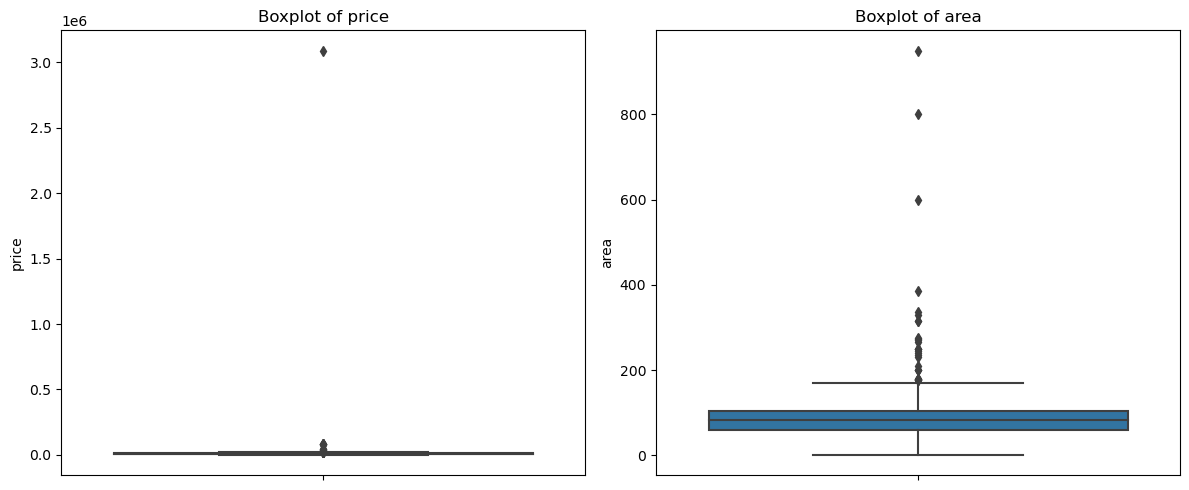

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'])
plt.title('Boxplot of price')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['area'])
plt.title('Boxplot of area')
plt.tight_layout()
plt.show()


Filtering outliers based on the boxplot analysis.

In [26]:
df = df[(df['area'] >= 10) & (df['area'] <=200)]
df = df[df['room_num'] > 0]
df = df[(df['price'] > 1000) & (df['price'] < 17000)]

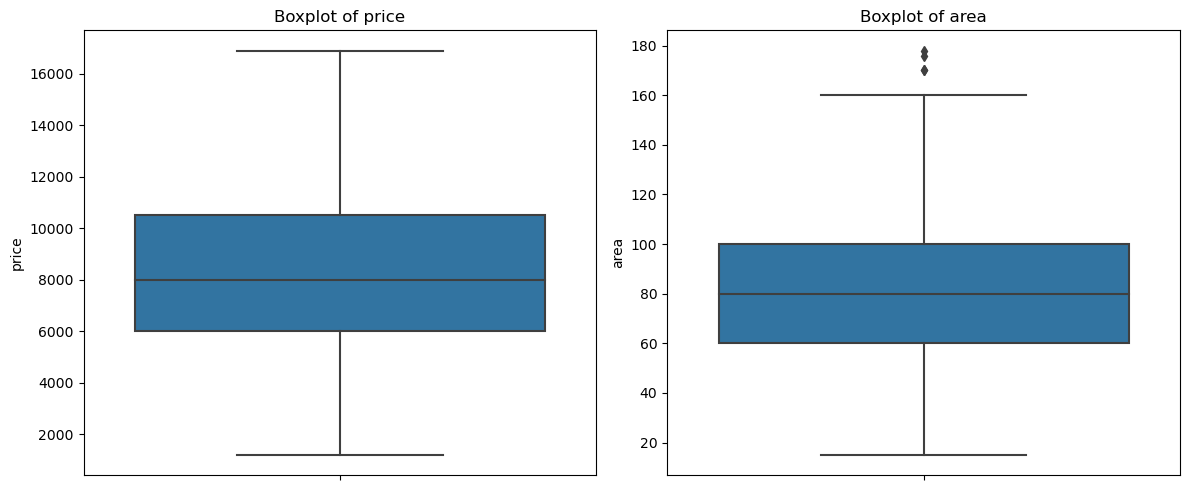

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'])
plt.title('Boxplot of price')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['area'])
plt.title('Boxplot of area')
plt.tight_layout()
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 706
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_type         605 non-null    object 
 1   neighborhood          605 non-null    object 
 2   address               605 non-null    object 
 3   room_num              605 non-null    float64
 4   floor                 605 non-null    object 
 5   area                  605 non-null    int64  
 6   garden_area           605 non-null    float64
 7   days_to_enter         605 non-null    float64
 8   num_of_payments       605 non-null    float64
 9   monthly_arnona        605 non-null    float64
 10  building_tax          605 non-null    float64
 11  total_floors          605 non-null    object 
 12  description           601 non-null    object 
 13  has_parking           605 non-null    int64  
 14  has_storage           605 non-null    int64  
 15  elevator              6

For the distance_from_center column, since it is an important feature that can significantly influence rental price predictions, we implemented a two-step strategy.
First, for any neighborhood where all values in distance_from_center are missing, we removed those rows completely, because there’s no meaningful value to fill in such cases.
Second, for the remaining rows, we filled in missing distance_from_center values using the average distance for that neighborhood. This approach ensures that missing data is replaced with a logical estimate that reflects the typical proximity for that area, while also preserving as much useful data as possible.

In [29]:
def handle_distance_from_center(df):
    # Step 1: Check if there are neighborhoods with all NaN values in distance_from_center
    neighborhoods_with_all_nan = df.groupby('neighborhood')['distance_from_center'].transform(lambda x: x.isna().all())

    # Step 2: If all values in the neighborhood are NaN -> drop those rows
    if neighborhoods_with_all_nan.any():
        df = df[~neighborhoods_with_all_nan]

    # Step 3: Otherwise, fill missing values with neighborhood mean
    df.loc[:, 'distance_from_center'] = df['distance_from_center'].fillna(df.groupby('neighborhood')['distance_from_center'].transform('mean'))
    
    return df

In [30]:
df = handle_distance_from_center(df)

C:\Users\USER\AppData\Local\Temp\ipykernel_25780\3478976878.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'distance_from_center'] = df['distance_from_center'].fillna(df.groupby('neighborhood')['distance_from_center'].transform('mean'))


Converting each column to its appropriate data type.

In [31]:
df['floor'] = df['floor'].astype(int)
df['garden_area'] = df['garden_area'].astype(int)
df['days_to_enter'] = df['days_to_enter'].astype(int)
df['num_of_payments'] = df['num_of_payments'].astype(int)
df['monthly_arnona'] = df['monthly_arnona'].astype(int)
df['building_tax'] = df['building_tax'].astype(int)
df['total_floors'] = df['total_floors'].astype(int)
df['num_of_images'] = df['num_of_images'].astype(int)
df['handicap'] = df['handicap'].astype(int)
df['distance_from_center'] = df['distance_from_center'].astype(float)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 706
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_type         596 non-null    object 
 1   neighborhood          596 non-null    object 
 2   address               596 non-null    object 
 3   room_num              596 non-null    float64
 4   floor                 596 non-null    int32  
 5   area                  596 non-null    int64  
 6   garden_area           596 non-null    int32  
 7   days_to_enter         596 non-null    int32  
 8   num_of_payments       596 non-null    int32  
 9   monthly_arnona        596 non-null    int32  
 10  building_tax          596 non-null    int32  
 11  total_floors          596 non-null    int32  
 12  description           592 non-null    object 
 13  has_parking           596 non-null    int64  
 14  has_storage           596 non-null    int64  
 15  elevator              5

The goal was to standardize and unify the property type column by replacing different variations and rare property types with a consistent set of categories. For example, different names for apartments or penthouses were merged under the same label, and rare or niche types (like studios or basement units) were grouped together as “general.” This ensures consistent data, reduces noise, and makes the model easier to interpret.

In [33]:
df['property_type'] = df['property_type'].replace('דירה להשכרה', 'דירה')
df['property_type'] = df['property_type'].replace('דירת גן להשכרה' , 'דירת גן')
df['property_type'] = df['property_type'].replace('גג/פנטהאוז להשכרה' ,'גג/פנטהאוז')
df['property_type'] = df['property_type'].replace('גג/ פנטהאוז' ,'גג/פנטהאוז')
df['property_type'] = df['property_type'].replace('באתר מופיע ערך שלא ברשימה הסגורה' ,'דירה')
df['property_type'] = df['property_type'].replace('החלפת דירות' ,'דירה')
df['property_type'] = df['property_type'].replace('Квартира' ,'דירה')
df['property_type'] = df['property_type'].replace({
    'דופלקס': 'גג/פנטהאוז',
    'דו משפחתי': "פרטי/קוטג'",
    'מרתף/פרטר': 'כללי',
    'סטודיו/לופט': 'כללי',
    'יחידת דיור': 'כללי'
})


In [34]:
df['property_type'].unique()

array(['דירה', 'דירת גן', 'גג/פנטהאוז', 'כללי', "פרטי/קוטג'"],
      dtype=object)

Removing storage and parking entries (keeping only residential rental properties).

In [35]:
df = df[(df['property_type'] != 'מחסן') & (df['property_type'] != 'חניה')]
df['property_type'].unique()

array(['דירה', 'דירת גן', 'גג/פנטהאוז', 'כללי', "פרטי/קוטג'"],
      dtype=object)

In [36]:
df['neighborhood'].unique()

array(['הצפון הישן החלק המרכזי', 'בית שטראוס', 'התקווה', 'הגוש הגדול',
       'נוה שרת', 'קרית שלום', 'יפו ד', 'נוה חן',
       'לב תל אביב החלק הדרומי', 'תל חיים', 'כרם התימנים', 'כפיר',
       'תל כביר', 'בצרון', 'שפירא', 'הצפון החדש החלק הצפוני',
       'תל ברוך צפון', 'נוה אליעזר', 'צפון יפו', 'נחלת יצחק',
       'מרכז יפו מזרחית לשדרות ירושלים', 'נוה שאנן', 'גבעת הרצל',
       'רמת החייל', 'רמת אביב החדשה', 'עזרא', 'יד אליהו', 'רביבים',
       'נאות אפקה ב', 'אזורי חן', 'הדר יוסף', 'לבנה', 'לינקולן',
       'חוף הצוק', 'נאות אפקה א', 'פארק צמרת', 'הקריה', 'שיכוני חסכון',
       'המשתלה', 'צהלון', 'דקר', 'רמת הטייסים', 'רמת אביב', 'יפו ג',
       'רמת ישראל', 'אפקה', 'נוה אביבים', 'הצפון החדש החלק הדרומי',
       'מע"ר צפוני', 'הצפון הישן החלק הצפוני',
       'הצפון הישן החלק הדרום מזרחי', 'רמת אביב ג', "עג'מי", 'פלורנטין',
       'שבזי', 'שיכון בבלי', 'הצפון החדש סביבת ככר המדינה', 'מונטיפיורי',
       'הצפון הישן החלק הדרום מערבי'], dtype=object)

### Feature Engineering
We created new features to provide the model with richer and more informative data:


##### num_of_amenities
Summed the presence of amenities (like parking, balcony, elevator, etc.).
Motivation: A higher number of amenities usually means a higher rental price, so this aggregates that effect into one feature.

##### is_central
Created a binary variable that is True (1) for apartments within 1.5 km of the city center and False (0) otherwise.
Motivation: Proximity to the city center strongly influences rent.

##### Encoding Categorical Variables
We converted the property_type column into a numerical representation using OneHotEncoding.
We then added these encoded columns to the DataFrame.
Motivation: Machine learning models work better with numerical data. OneHotEncoding avoids implying any order between different property types.

##### Neighborhood Feature
We added neighborhood_encoded, a new feature based on the average rental price in each neighborhood.
Motivation: This feature captures the overall price level in a neighborhood, giving the model a valuable context about location.

##### These engineered features and categorical encodings significantly enhance the dataset, making it more informative and ready for predictive modeling. Let me know if you’d like to refine this further!

In [37]:
#feture engeneering
df['num_of_amenities'] = df[['has_parking', 'has_storage', 'elevator', 'ac', 'handicap', 'has_bars', 'has_safe_room', 'has_balcony', 'is_furnished', 'is_renovated']].sum(axis=1)
df['is_central'] = df['distance_from_center'] < 1500 

#קטגוריאלי
# בפונקציה קיים תנאי- האם נכנס סט אימון או בדיקה וקיים שמירת הנתונים בקובץ וטעינתם
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore', dtype=int)
encoded = encoder.fit_transform(df[['property_type']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['property_type']), index=df.index)
df = pd.concat([df.drop(columns=['property_type']), encoded_df], axis=1)    


neighborhood_map = df.groupby('neighborhood')['price'].mean()
df['neighborhood_encoded'] = df['neighborhood'].map(neighborhood_map)

In [38]:
df

,neighborhood,address,room_num,floor,area,garden_area,days_to_enter,num_of_payments,monthly_arnona,building_tax,...,num_of_images,distance_from_center,num_of_amenities,is_central,property_type_גג/פנטהאוז,property_type_דירה,property_type_דירת גן,property_type_כללי,property_type_פרטי/קוטג',neighborhood_encoded
0,הצפון הישן החלק המרכזי,"מהר""ל 25",3.0,2,71,0,0,12,467,614,...,6,1005.00,6,True,0,1,0,0,0,8293.857143
1,הצפון הישן החלק המרכזי,ארלוזורוב 35,3.0,1,70,0,0,12,240,190,...,3,253.00,3,True,0,1,0,0,0,8293.857143
2,הצפון הישן החלק המרכזי,וורמיזה 5,2.5,1,65,0,0,12,400,150,...,8,740.00,6,True,0,1,0,0,0,8293.857143
3,הצפון הישן החלק המרכזי,עמנואל הרומי 30,2.0,3,40,0,0,12,100,100,...,2,1206.00,0,True,0,1,0,0,0,8293.857143
4,הצפון הישן החלק המרכזי,ארלוזורוב 50,3.0,1,70,0,0,11,250,50,...,5,255.00,3,True,0,1,0,0,0,8293.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,מונטיפיורי,יהודית 33,2.5,5,55,0,0,12,500,300,...,3,1.69,6,True,1,0,0,0,0,6080.000000
703,הצפון הישן החלק הדרום מערבי,בן יהודה 88,3.0,2,90,0,0,12,500,250,...,4,1.11,4,True,0,1,0,0,0,8863.333333
704,הצפון הישן החלק הדרום מערבי,רופין 22,2.0,3,80,0,0,12,450,80,...,5,1.57,3,True,0,1,0,0,0,8863.333333
705,מונטיפיורי,שדרות יהודית 27,1.0,3,30,0,0,6,180,50,...,0,3.21,3,True,0,0,0,1,0,6080.000000


In [39]:
df.head(2).T

,0,1
neighborhood,הצפון הישן החלק המרכזי,הצפון הישן החלק המרכזי
address,"מהר""ל 25",ארלוזורוב 35
room_num,3.0,3.0
floor,2,1
area,71,70
garden_area,0,0
days_to_enter,0,0
num_of_payments,12,12
monthly_arnona,467,240
building_tax,614,190


In [40]:
df['days_to_enter'].unique()

array([0])

We removed columns that were either not useful for the model, contained the same value throughout, or were already combined into another feature. This helps reduce noise and redundancy in the data, improving the model’s performance and interpretability.

In [41]:
drop_col = ['neighborhood', 'address','days_to_enter','has_parking', 'has_storage', 'elevator', 'ac',
       'handicap', 'has_bars', 'has_safe_room', 'has_balcony', 'is_furnished','is_renovated',
        'num_of_images','num_of_payments','distance_from_center','description']
df = df.drop(drop_col , axis = 1)

In [42]:
df = df[[col for col in df.columns if col != 'price'] + ['price']]
df = df.reset_index(drop=True)
df

,room_num,floor,area,garden_area,monthly_arnona,building_tax,total_floors,num_of_amenities,is_central,property_type_גג/פנטהאוז,property_type_דירה,property_type_דירת גן,property_type_כללי,property_type_פרטי/קוטג',neighborhood_encoded,price
0,3.0,2,71,0,467,614,4,6,True,0,1,0,0,0,8293.857143,10150.0
1,3.0,1,70,0,240,190,4,3,True,0,1,0,0,0,8293.857143,6600.0
2,2.5,1,65,0,400,150,4,6,True,0,1,0,0,0,8293.857143,9000.0
3,2.0,3,40,0,100,100,3,0,True,0,1,0,0,0,8293.857143,5800.0
4,3.0,1,70,0,250,50,4,3,True,0,1,0,0,0,8293.857143,7700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,2.5,5,55,0,500,300,5,6,True,1,0,0,0,0,6080.000000,6300.0
592,3.0,2,90,0,500,250,4,4,True,0,1,0,0,0,8863.333333,15000.0
593,2.0,3,80,0,450,80,5,3,True,0,1,0,0,0,8863.333333,8000.0
594,1.0,3,30,0,180,50,3,3,True,0,0,0,1,0,6080.000000,4000.0
